# Part 2 : meteorological data : dimensionality
reduction and visualization

## Data analysis

We start by loading the libraries that we will use in this exercise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

We load the information from the sensors.

In [2]:
data = np.load('data.npy');
print(data)
data.shape

[[-1.38188647e+00 -8.90671589e+00  6.30329341e-01  3.76533414e+00
   5.65632216e+00 -1.30523753e+01]
 [-9.93854603e+00  2.10250289e+01  2.68751481e+01  4.45856939e+01
   1.25211138e+02 -8.79060915e+00]
 [-8.89113828e+00  3.64108092e+00  2.61137941e+01  4.62931432e+01
   1.24634525e+02 -2.30323339e+01]
 ...
 [-1.37312859e+00  7.97471063e+00  1.83327960e+01  4.19480139e+01
   9.69464020e+01  3.85532487e+00]
 [ 6.36706362e+00  1.23668259e-01 -6.66520255e+00 -2.23112092e+00
  -2.22267286e+01  1.92248591e+01]
 [ 7.29100547e+00  6.52879768e+00 -2.05608384e+01 -2.81905523e+01
  -8.98730674e+01  2.84018141e+01]]


(800, 6)

We can see an example of the information from each sensor and that there are 800 data samples and 6 sensors.

We load the 'labels' that correspond to whether there was a tempest.

In [3]:
labels = np.load('labels.npy');
print(labels)
labels.shape

[1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.

(800,)

We can see that there are 800 results corresponding to each data sample.

## Dimensionality reduction

### Linear dimensionality reduction with Principal component analysis (PCA)

We will display the variance of the number of components to know if we lose a lot.

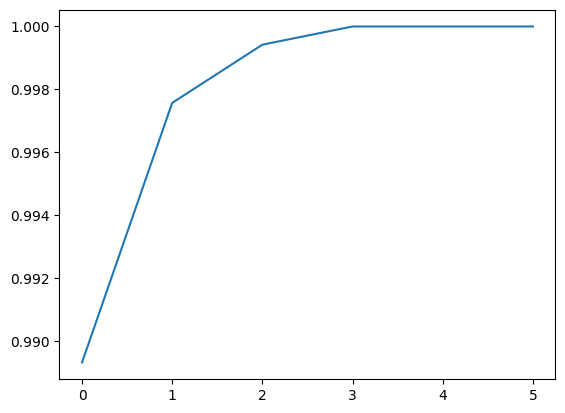

In [4]:
pca = PCA(n_components=6)
projected_data = pca.fit_transform(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

We can see that the variance remains very good even with two components.

We will use PCA to keep 2 components and display them.

(800, 2)


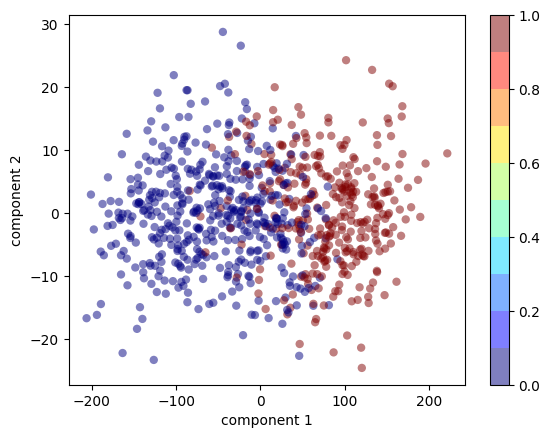

In [5]:
pca = PCA(n_components=2)
projected_data = pca.fit_transform(data)

print(projected_data.shape)

plt.scatter(
    projected_data[:, 0],
    projected_data[:, 1],
    c=labels,
    edgecolor="none",
    alpha=0.5,
    cmap=plt.cm.get_cmap("jet", 10),
)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.colorbar()

We can see how the samples in the dataset are organised in 2D space. You can see that the tempests are on the right.

We will now look at samples with 3 components.

(800, 3)


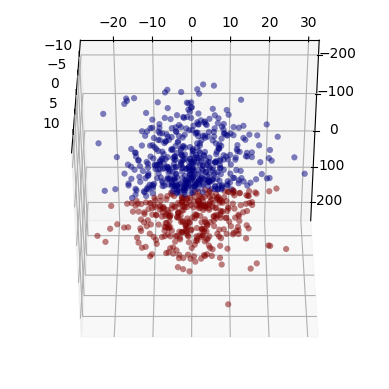

In [6]:
pca2 = PCA(n_components=3)
projected_data2 = pca2.fit_transform(data)

print(projected_data2.shape)

plt.figure()

ax = plt.axes(projection='3d')
ax.view_init(130, 0, 0)
ax.scatter(
    projected_data2[:, 0],
    projected_data2[:, 1],
    projected_data2[:, 2],
    c=labels,
    edgecolor="none",
    alpha=0.5,
    cmap=plt.cm.get_cmap("jet", 10)
)

We can see how the samples in the dataset are organised in 3D space. You can see that the tempests are on the right but even better than in 2D space.

### Non-Linear dimensionality reduction with Multidimensional scaling (MDS)

We will use MDS to keep 2 components and display them.

(800, 2)


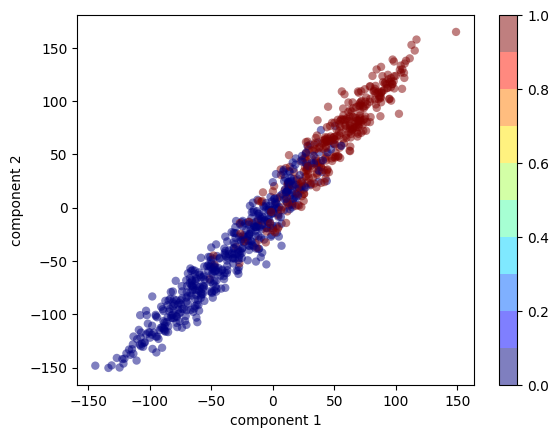

In [7]:
mds = MDS(n_components=2)

projected_data_mds = mds.fit_transform(data)
print(projected_data_mds.shape)

plt.scatter(
    projected_data_mds[:, 0],
    projected_data_mds[:, 1],
    c=labels,
    edgecolor="none",
    alpha=0.5,
    cmap=plt.cm.get_cmap("jet", 10),
)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.colorbar()

We can see that with MDS the result is very similar to PCA in 2D. We can see that there are two groups, tempests and non-tempests.

We will now look at samples with 3 components.

(800, 3)


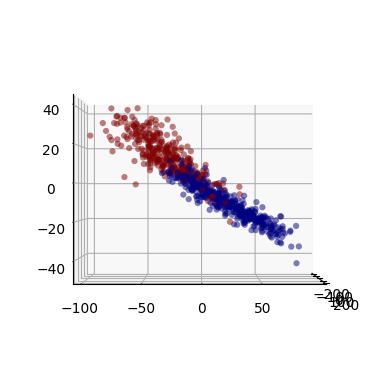

In [8]:
mds2 = MDS(n_components=3)

projected_data_mds2 = mds2.fit_transform(data)
print(projected_data_mds2.shape)

plt.figure()

ax = plt.axes(projection='3d')
ax.view_init(0, 0, 0)
ax.scatter(
    projected_data_mds2[:, 0],
    projected_data_mds2[:, 1],
    projected_data_mds2[:, 2],
    c=labels,
    edgecolor="none",
    alpha=0.5,
    cmap=plt.cm.get_cmap("jet", 10)
)

One can see that with MDS in a 3D space the data is not very organised. PCA is arguably more appropriate in our situation.

With MDS the result is much less readable than with PCA.

## Conclusion

To conclude, using two components and three components gives a very close result. We can see that with three components we will probably get a better prediction result.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=78fee1a8-8fdd-4237-ba69-e565ec384717' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>